**Diabetes Prediction:**

Name: Sadaf Younes


In [ ]:
# importing libraries
import numpy as np
import pandas as pd

**Uploading Dataset**

In [ ]:
# loading the diabetes DiabeticDatasetset to a pandas DiabeticDatasetFrame
DiabeticDataset = pd.read_csv('/content/diabetes.csv')

In [ ]:
# printing the first 5 rows of the DiabeticDatasetset
DiabeticDataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# number of rows and Columns in this DiabeticDatasetset
DiabeticDataset.shape

(768, 9)

**Data preprocessing**


In [ ]:
# getting the statistical measures of the DiabeticDataset
DiabeticDataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
DiabeticDataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Not Diabetic

1 --> Diabetic

In [ ]:
DiabeticDataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
DiabeticDataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# separating the data and labels
features = DiabeticDataset.drop(columns = 'Outcome', axis=1)
target = DiabeticDataset['Outcome'].values

In [ ]:
print(features)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(target)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

In [ ]:
features.shape

(768, 8)

In [ ]:
target.shape

(768,)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


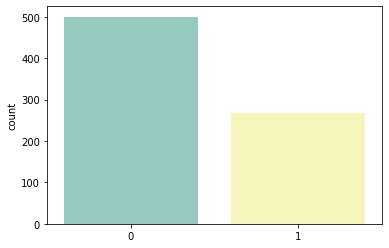

In [ ]:
import seaborn as sns
sns.countplot(target, palette = "Set3")

DiabeticDataset Normalization through **MinMax**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
minMax = MinMaxScaler(feature_range=(0, 1))

In [ ]:
rescaled_features = minMax.fit_transform(features)

In [ ]:
print(rescaled_features)

[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]


Diabetic Dataset Normalization through **z-score**

In [ ]:
import scipy.stats as stats

In [ ]:
stats.zscore(DiabeticDataset)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,-0.732120
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,-0.732120
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,-0.732120
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1.365896


DiabeticDataset Normalization through **PCA**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.decomposition import PCA
P_C_A = PCA()
PCA_Transform = P_C_A.fit_transform(features)

In [ ]:
df= pd.DataFrame(PCA_Transform)
print(df)

             0          1          2          3          4         5  \
0   -75.714655 -35.950783  -7.260789  15.669269  16.506541  3.460442   
1   -82.358268  28.908213  -5.496671   9.004554   3.481527  5.590262   
2   -74.630643 -67.906496  19.461808  -5.653056 -10.300113  7.144367   
3    11.077423  34.898486  -0.053018   1.314873  -7.619414  2.583855   
4    89.743788  -2.746937  25.212859  18.994237   8.522694 -9.486986   
..         ...        ...        ...        ...        ...       ...   
763  99.237881  25.080927 -19.534825   4.438332  35.616971  3.615785   
764 -78.641239  -7.688010  -4.137227  13.740154  -4.532273 -2.519062   
765  32.113198   3.376665  -1.587864  -0.878445  -2.979288  6.239038   
766 -80.214494 -14.186020  12.351264 -14.294259   8.532950 -2.842307   
767 -81.308150  21.621496  -8.152768  13.821706  -4.913207  3.173476   

            6         7  
0   -0.702047  0.094977  
1   -2.572015 -0.091535  
2    4.279067  0.271011  
3   -0.809829 -0.273305  
4   -

**Training a model using MinMax Standardization**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
features =  minMax.fit_transform(features)
target = DiabeticDataset['Outcome'].values

In [ ]:
print(features)
print(target)

[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 

**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(features,target, test_size = 0.33, random_state=2)

In [ ]:
print(features.shape, X_train.shape, X_test.shape)

(768, 8) (514, 8) (254, 8)


**Classifier 1: K Nearest Neighbour**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier1 = LogisticRegression(random_state=16)

In [ ]:
classifier1.fit(X_train, Y_train)

LogisticRegression(random_state=16)

In [ ]:
y_pred = classifier1.predict(X_test)

Text(91.68, 0.5, 'Predicted class')

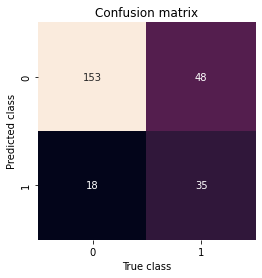

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)
sns.heatmap(confusion_matrix.T, square= True, annot= True, fmt='d', cbar=False)

plt.title('Confusion matrix')
plt.xlabel('True class')
plt.ylabel('Predicted class')

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)

Text(0.5, 257.44, 'Predicted label')

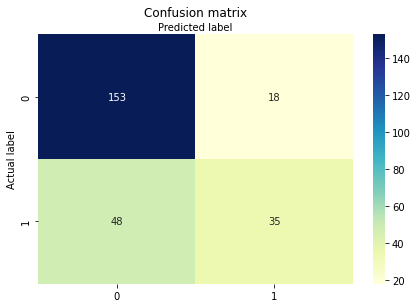

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Accuracy Score**

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy", accuracy_score(Y_test, y_pred)*100)

Accuracy 74.01574803149606


In [ ]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(classifier1, X_train, Y_train, cv= 5, scoring= "accuracy")

print(cv_score)

mean_accuracy_lr = sum(cv_score)/len(cv_score)

mean_accuracy_lr = mean_accuracy_lr*100

mean_accuracy_lr = round(mean_accuracy_lr, 2)

print("Mean Accuracy: ",mean_accuracy_lr)

[0.7184466  0.72815534 0.7961165  0.77669903 0.81372549]
Mean Accuracy:  76.66


In [ ]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(Y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.76      0.89      0.82       171
   with diabetes       0.66      0.42      0.51        83

        accuracy                           0.74       254
       macro avg       0.71      0.66      0.67       254
    weighted avg       0.73      0.74      0.72       254



**Making a Predictive System**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features)

input_data = (4,93,70,34,5,33.3,0.234,43)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier1.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[1.90518679e+01 5.75432615e+02 4.37926187e+02 2.09854441e+02
  3.60357592e+01 2.79531696e+02 4.65556422e-01 2.18484854e+02]]
[1]
The person is diabetic


**Classifier 2: Random Forest**

Training a model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier2 = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

**Train Test Split**

In [ ]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(features,target, test_size = 0.33, random_state=2)

In [ ]:
classifier2.fit(X_Train,Y_Train)

RandomForestClassifier(max_features='sqrt')

In [ ]:
y_pred2 = classifier2.predict(X_Test)

**Accuracy Score**

In [ ]:
print("Accuracy", accuracy_score(Y_Test, y_pred2)*100)

Accuracy 76.37795275590551


In [ ]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(Y_test, y_pred2, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.78      0.89      0.84       171
   with diabetes       0.69      0.49      0.58        83

        accuracy                           0.76       254
       macro avg       0.74      0.69      0.71       254
    weighted avg       0.76      0.76      0.75       254



In [ ]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(classifier2, X_Train, Y_Train, cv= 5, scoring= "accuracy")

print(cv_score)

mean_accuracy_lr = sum(cv_score)/len(cv_score)

mean_accuracy_lr = mean_accuracy_lr*100

mean_accuracy_lr = round(mean_accuracy_lr, 2)

print("Mean Accuracy: ",mean_accuracy_lr)

[0.72815534 0.70873786 0.78640777 0.72815534 0.81372549]
Mean Accuracy:  75.3


Text(91.68, 0.5, 'Predicted class')

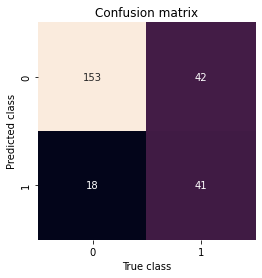

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_Test, y_pred2)
sns.heatmap(confusion_matrix.T, square= True, annot= True, fmt='d', cbar=False)

plt.title('Confusion matrix')
plt.xlabel('True class')
plt.ylabel('Predicted class')

Text(0.5, 257.44, 'Predicted label')

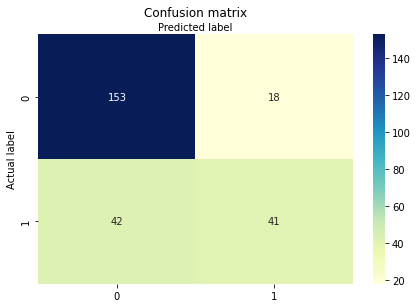

In [ ]:
cnf_matrix = metrics.confusion_matrix(Y_Test, y_pred2)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Making a predictive system**

In [ ]:
scaler2 = StandardScaler()
scaler2.fit(features)

input_data = (4,93,70,34,5,33.3,0.234,43)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler2.transform(input_data_reshaped)
print(std_data)

prediction = classifier2.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[1.90518679e+01 5.75432615e+02 4.37926187e+02 2.09854441e+02
  3.60357592e+01 2.79531696e+02 4.65556422e-01 2.18484854e+02]]
[1]
The person is diabetic
